In [19]:
%matplotlib inline
import math
from matplotlib import pyplot as plt
from wpilib.controller import ProfiledPIDController
from wpimath.trajectory import TrapezoidProfile
from wpimath.geometry import Rotation2d


In [20]:
theta = Rotation2d()
omega = 0.0
iterations = 500
dt = 0.020
setpoint = Rotation2d.fromDegrees(180)

constraints = TrapezoidProfile.Constraints(maxVelocity=1e6, maxAcceleration=1e6)
pid = ProfiledPIDController(Kp=5.0, Ki=0.0, Kd=0.0, constraints=constraints)
pid.enableContinuousInput(-math.pi, math.pi)

data = {}
data['none'] = {}
data['none']['time'] = []
data['none']['theta'] = []
data['none']['omega'] = []
data['none']['setpoint'] = []

for i in range(iterations):
    if i > 200:
        setpoint = Rotation2d.fromDegrees(90)

    data['none']['setpoint'].append(setpoint.degrees())
    data['none']['omega'].append(math.degrees(omega))
    data['none']['theta'].append(theta.degrees())
    data['none']['time'].append(i * dt)

    omega = pid.calculate(theta.radians(), setpoint.radians())
    theta = theta + Rotation2d(omega * dt)


# plt.plot(data['none']['time'], data['none']['setpoint'])
# plt.plot(data['none']['time'], data['none']['theta'])


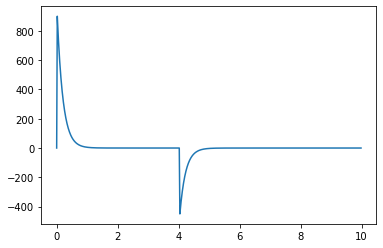

In [21]:
plt.plot(data['none']['time'], data['none']['omega'])

In [22]:
theta = Rotation2d()
omega = 0.0
iterations = 500
dt = 0.020
setpoint = Rotation2d.fromDegrees(180)

constraints = TrapezoidProfile.Constraints(maxVelocity=2, maxAcceleration=4)
pid = ProfiledPIDController(Kp=5.0, Ki=0.0, Kd=0.0, constraints=constraints)
pid.enableContinuousInput(-math.pi, math.pi)

data['one'] = {}
data['one']['time'] = []
data['one']['theta'] = []
data['one']['omega'] = []
data['one']['setpoint'] = []

for i in range(iterations):
    if i > 200:
        setpoint = Rotation2d.fromDegrees(90)

    data['one']['setpoint'].append(setpoint.degrees())
    data['one']['omega'].append(math.degrees(omega))
    data['one']['theta'].append(theta.degrees())
    data['one']['time'].append(i * dt)

    omega = pid.calculate(theta.radians(), setpoint.radians())
    theta = theta + Rotation2d(omega * dt)

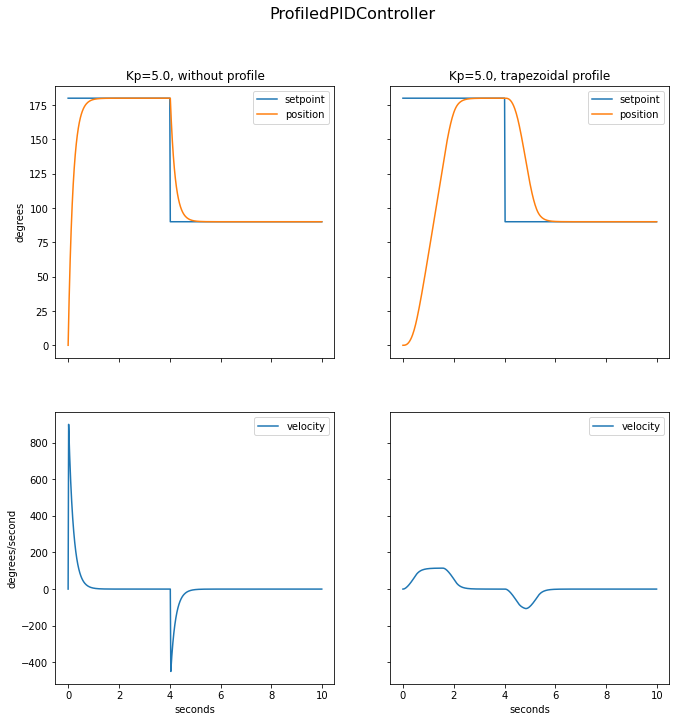

In [29]:
fig, axs = plt.subplots(2, 2, sharex='all', sharey='row', figsize=(11, 11))
fig.suptitle('ProfiledPIDController', fontsize=16)
axs[0][0].set_title(f"Kp={pid.getP()}, without profile")
axs[0][0].plot(data['none']['time'], data['none']['setpoint'], label='setpoint')
axs[0][0].plot(data['none']['time'], data['none']['theta'], label='position')
axs[0][0].legend()
axs[0][0].set_ylabel('degrees')
axs[1][0].plot(data['none']['time'], data['none']['omega'], label='velocity')
axs[1][0].legend()
axs[1][0].set_xlabel('seconds')
axs[1][0].set_ylabel('degrees/second')
axs[0][1].set_title(f"Kp={pid.getP()}, trapezoidal profile")
axs[0][1].plot(data['one']['time'], data['one']['setpoint'], label='setpoint')
axs[0][1].plot(data['one']['time'], data['one']['theta'], label='position')
axs[0][1].legend()
axs[1][1].plot(data['one']['time'], data['one']['omega'], label='velocity')
axs[1][1].legend()
axs[1][1].set_xlabel('seconds')
fig.savefig('profiled_pid_controller.svg')